## Fandango's rating system - Is it still flawed ? 

    In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading.
    
    Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages HTML.  

    In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 200)

In [6]:
before = pd.read_csv('../input/fandango_score_comparison.csv')
after = pd.read_csv('../input/movie_ratings_16_17.csv')

In [7]:
fandango_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()

In [8]:
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]

In [9]:
fandango_before['Year'] = fandango_before['Year'].astype(int)

In [10]:
fandango_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

Population of interest is all the movies listed on Fandango website that have reviews on all the other review sites like rotten tomatoes, imdb, and metacritics.  

Sampling was not random in any of the two samples. In the first sample, all movies did not get an equal chance to be included because only the movies that have more than 30 user reviews on fandango with ratings on other critic websites were included. In the second sample, only the top 214 of most popular movies that have significant number of votes were selected Therefore, I do not think samples are representitive of the population.

In [11]:
fandango_before_2015 = fandango_before[fandango_before['Year'] == 2015].copy()

In [12]:
fandango_before_2015

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
5,The Water Diviner (2015),4.5,4.0,397,0.5,2015
6,Irrational Man (2015),4.0,3.5,252,0.5,2015
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,2015
9,Love & Mercy (2015),4.5,4.0,864,0.5,2015
10,Far From The Madding Crowd (2015),4.5,4.0,804,0.5,2015


In [13]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [14]:
after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [15]:
fandango_after_2016 = after[after['year'] == 2016].copy()

In [16]:
fandango_after_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [17]:
fandango_after_2016.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0


In [18]:
fandango_after_2016 = fandango_after_2016.loc[:,['movie','year','fandango']].copy()

In [19]:
fandango_after_2016

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5
10,Anthropoid,2016,4.0


In [20]:
fandango_after_2016.sample(10, random_state= 1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


In [21]:
plt.style.use('fivethirtyeight')

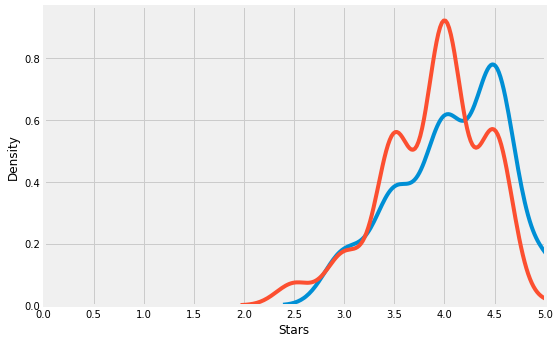

In [22]:
%matplotlib inline
fig = plt.figure(figsize=(8,5.5))
sns.kdeplot(fandango_before_2015['Fandango_Stars'], legend= True, label = '2015')
sns.kdeplot(fandango_after_2016['fandango'], legend= True, label = '2016')
plt.xlim(0,5)
plt.xlabel('Stars')
plt.ylabel('Density')
plt.xticks(np.arange(0,5.1,0.5))
plt.title('')
plt.show()

Both the distibutions seem to be left skewed with shapes almost similar to each other. However, ratings distribution for fandango_after_2016 are little less skewed than the ratings distributon for fandango_before_2015. Ratings distribution seem to have shifted left to the ratings distribution of fandango_before_2015. We can say that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016  

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

Since the samples have different number of movies, it makes more sense to compare the two tables using relative frequencies.For better readability purposes, lets look at the frequency distributions in percentages  



In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.
The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.
For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

In [23]:
fandango_before_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [24]:
fandango_after_2016['fandango'].value_counts(normalize = True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [25]:
mean_2015 = fandango_before_2015['Fandango_Stars'].mean()
mean_2016 = fandango_after_2016['fandango'].mean()

In [26]:
median_2015 = fandango_before_2015['Fandango_Stars'].median()
median_2016 = fandango_after_2016['fandango'].median()

In [27]:
mode_2015 = fandango_before_2015['Fandango_Stars'].mode()
mode_2016 = fandango_after_2016['fandango'].mode()

In [28]:
mean_2015

4.0852713178294575

In [29]:
mean_2016

3.887434554973822

In [30]:
median_2015

4.0

In [31]:
median_2016

4.0

In [32]:
mode_2015

0    4.5
dtype: float64

In [33]:
mode_2016[0]

4.0

In [34]:
summary = pd.DataFrame({'2015':[mean_2015,median_2015,mode_2015[0]], '2016':[mean_2016,median_2016,mode_2016[0]]}, index =['mean','median','mode'])

In [35]:
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


In [36]:
summary['2015']

mean      4.085271
median    4.000000
mode      4.500000
Name: 2015, dtype: float64

In [37]:
!pip install dash_daq

Processing /Users/madhavchekka/Library/Caches/pip/wheels/fe/54/53/a8d448db5592874db4313240571ca2c069e55f6a6b29bf5847/dash_daq-0.5.0-py3-none-any.whl
     |████████████████████████████████| 74 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 188 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 421 kB 6.2 MB/s eta 0:00:01
  Created wheel for dash: filename=dash-1.18.1-py3-none-any.whl size=83678 sha256=5787bf14e33621fe48de0a0c993efb29c82a522a26849c104872e099add946b7
  Stored in directory: /Users/madhavchekka/Library/Caches/pip/wheels/c1/f0/dc/4d5f7c91c8f773dfde06e6ed6c0a45c8cf213336b963118741
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013944 sha256=02651ce4da745b99ef2577ec08de0114b96c83685fdc60411acedabf09f24923
  

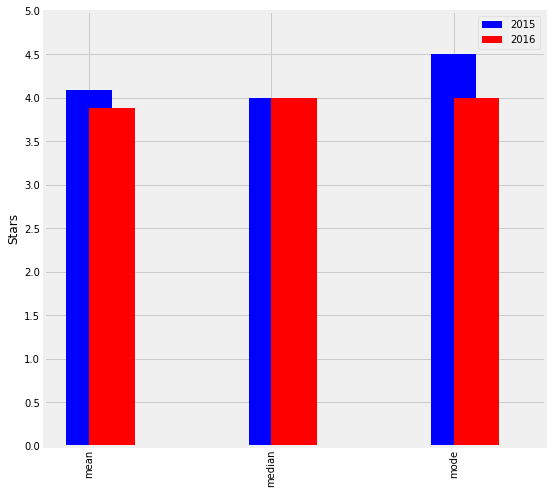

In [38]:
fig = plt.figure(figsize=(8,8))
summary['2015'].plot.bar(label = '2015',legend = True, width=0.25, color = 'b')
summary['2016'].plot.bar(align='edge', label = '2016', legend = True, color = 'r', width = 0.25)
plt.yticks(np.arange(0,5.1,0.5))
plt.legend(loc = 'upper right')
plt.ylabel('Stars')
plt.show()